In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, fetch_california_housing 

# load_diabetes

In [43]:
data = load_diabetes()
# data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names
X_frame = pd.DataFrame(X, columns=feature_names)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_frame, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


In [47]:
X_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,0.001442,0.000184,0.001736,0.001179,-0.000556,-0.000806,-0.000989,0.000377,0.001216,0.001891
std,0.046334,0.047644,0.047275,0.048469,0.047786,0.047631,0.047044,0.047790,0.047828,0.048380
min,-0.107226,-0.044642,-0.089197,-0.112399,-0.108893,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.030942,-0.044642,-0.032073,-0.036656,-0.035968,-0.032629,-0.032356,-0.039493,-0.033246,-0.030072
50%,0.009016,-0.044642,-0.005128,-0.005670,-0.004321,-0.004132,-0.006584,-0.002592,-0.000612,0.003064
75%,0.038076,0.050680,0.032595,0.035644,0.025950,0.027183,0.026550,0.034309,0.033654,0.032059
max,0.110727,0.050680,0.160855,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612


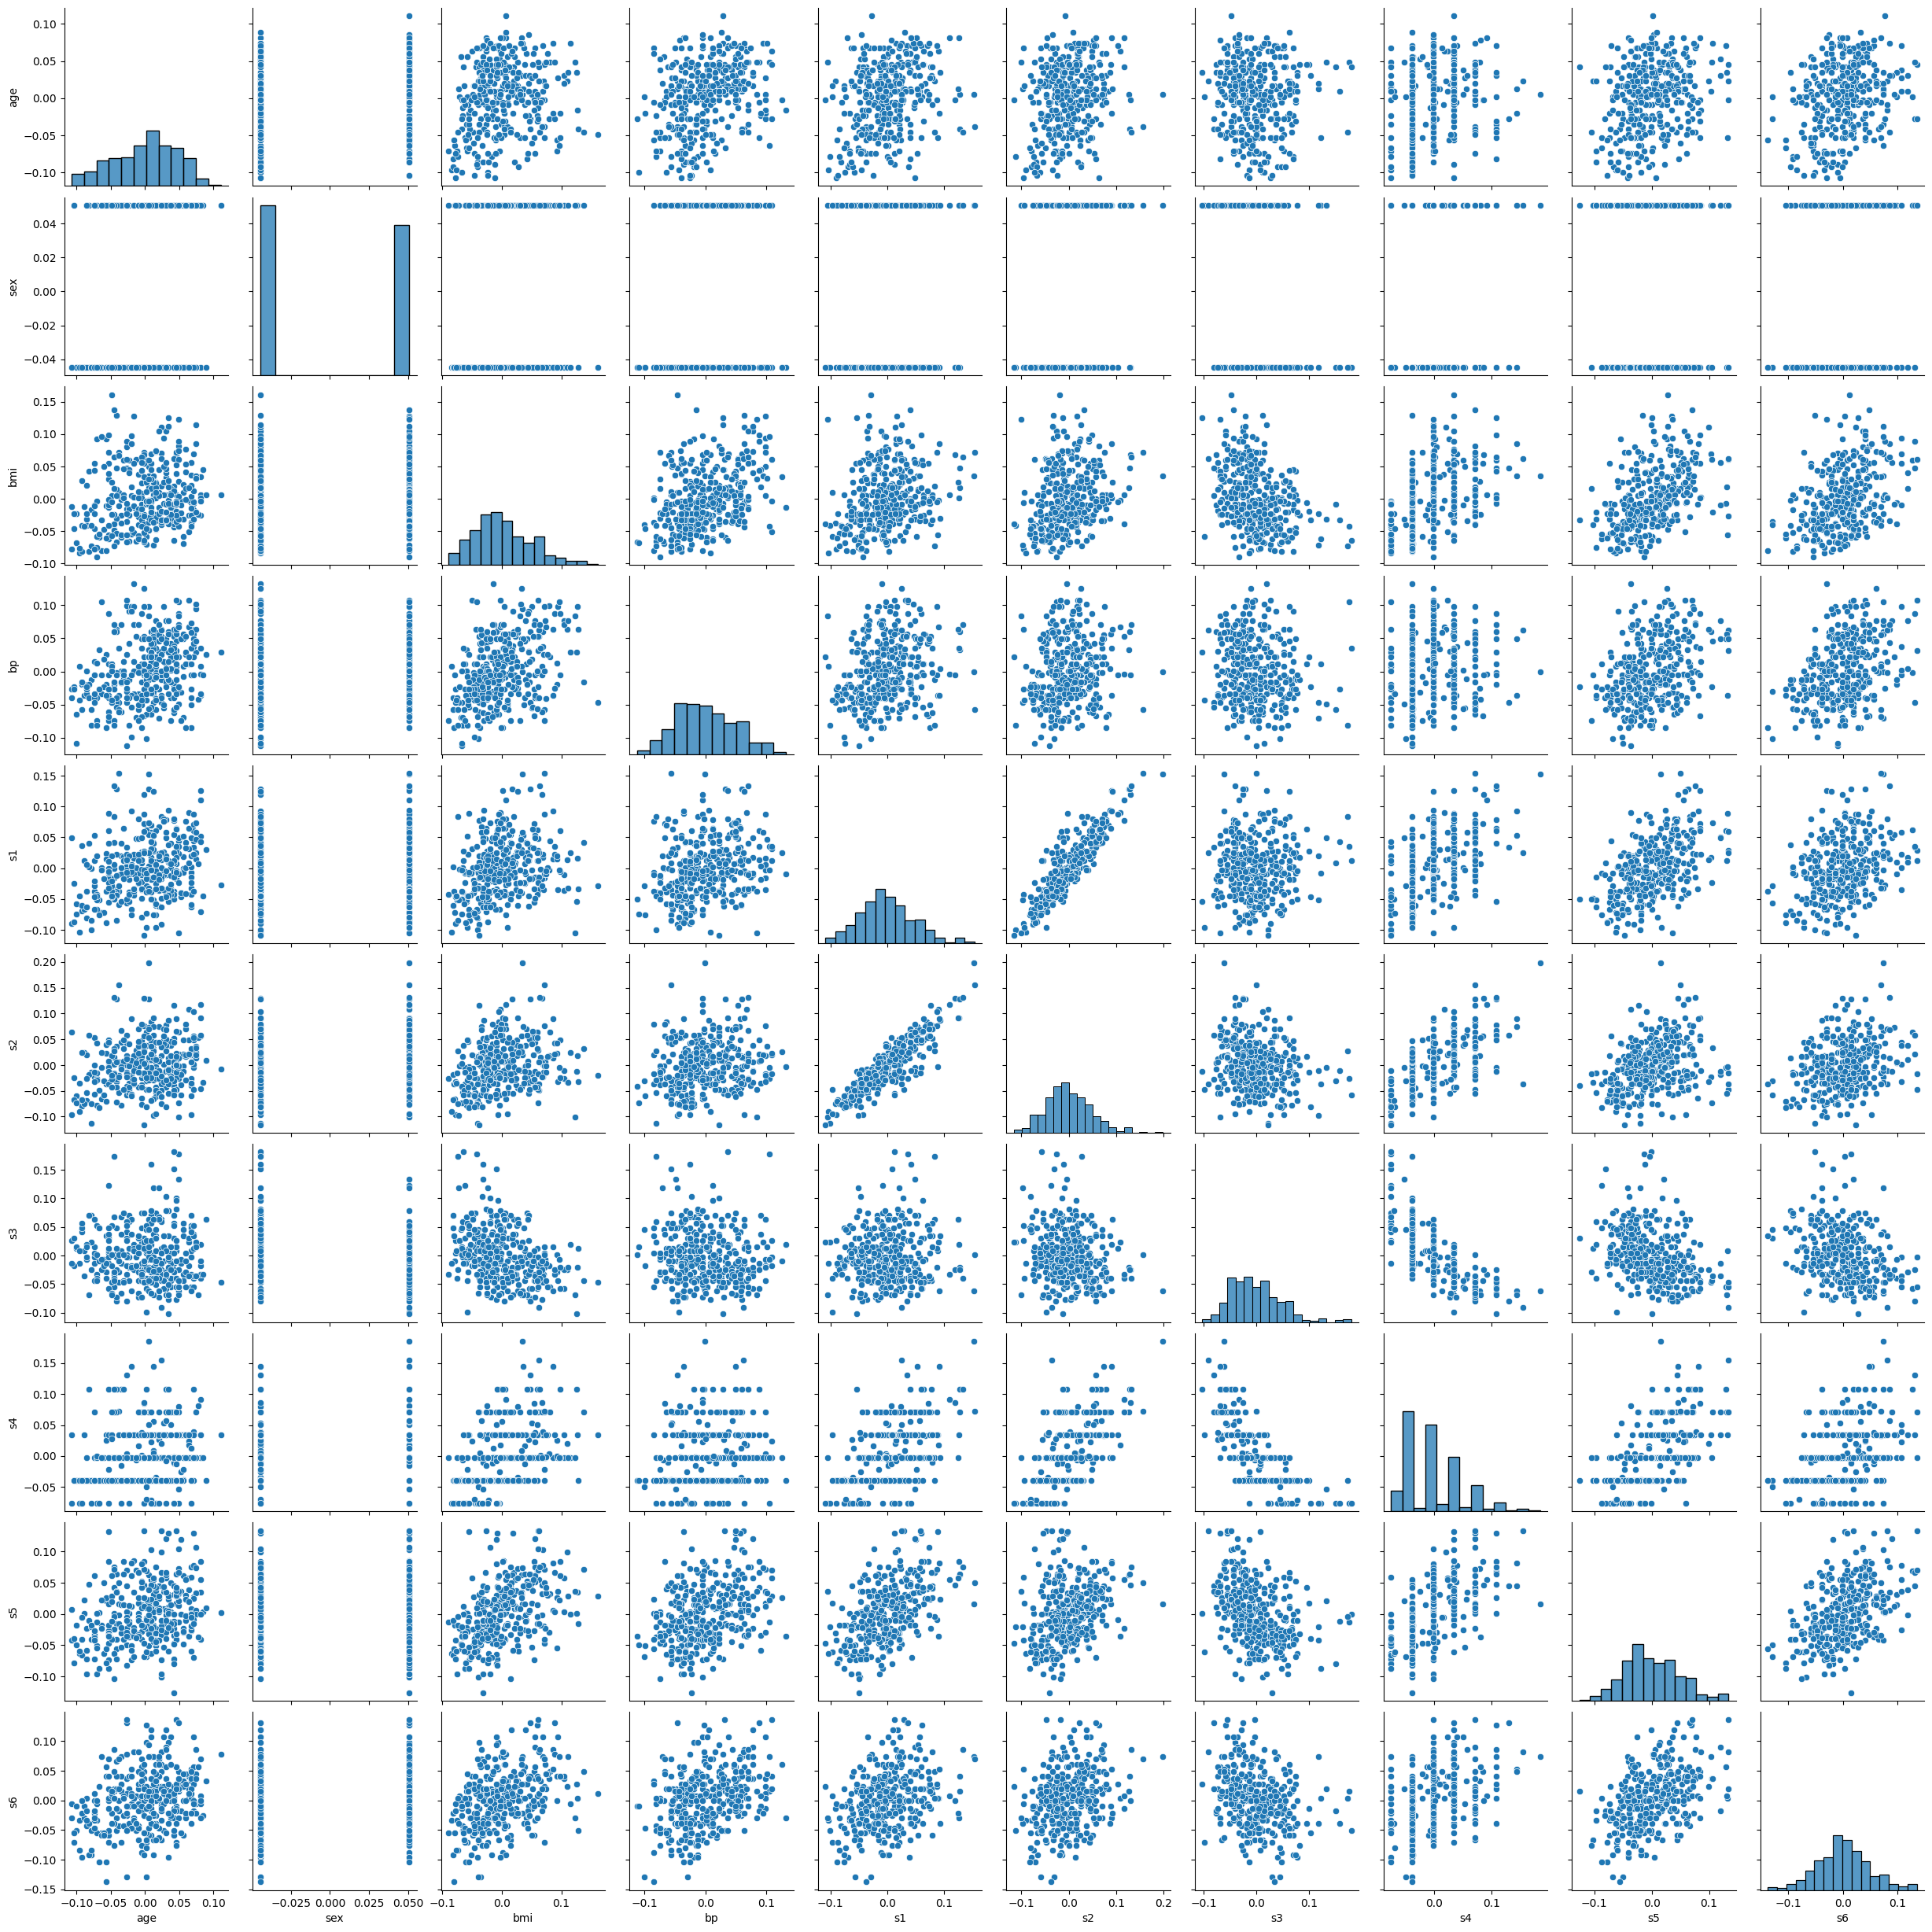

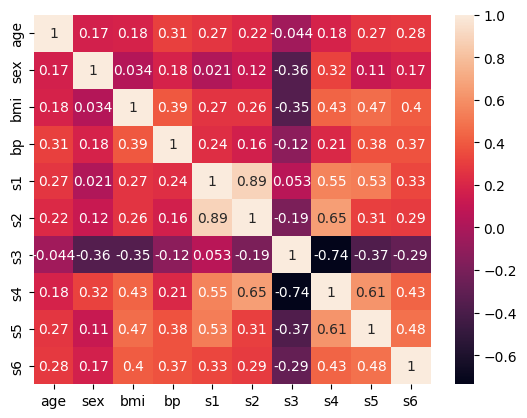

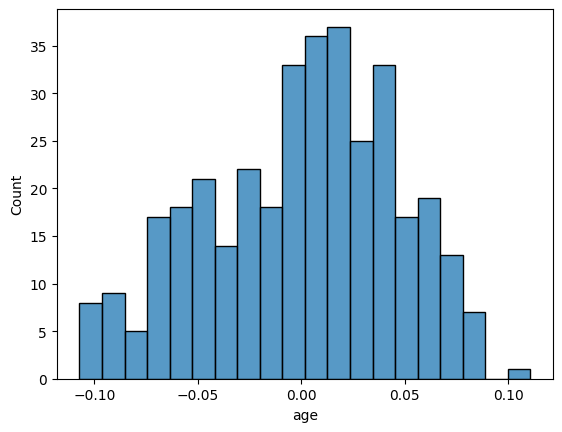

<Axes: xlabel='bmi', ylabel='Count'>

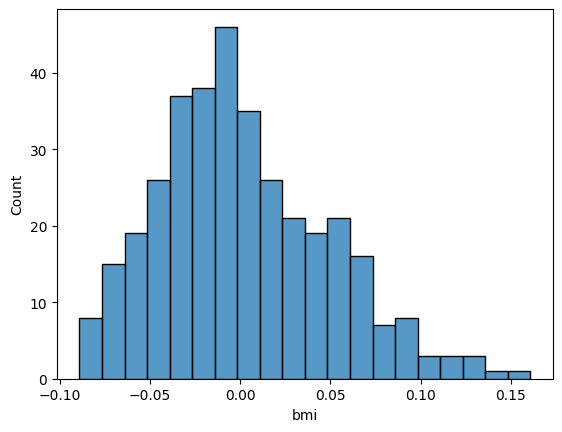

In [48]:
# EDA
sns.pairplot(X_train)
plt.show()
sns.heatmap(X_train.corr(), annot=True)
plt.show()
sns.histplot(X_train['age'], bins=20)
plt.show()
sns.histplot(X_train['bmi'], bins=20)

In [59]:
# Regresja liniowa
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)


# Dodawanie regularizacji L1
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_l1 = lasso.predict(X_test)


# Dodawanie regularizacji L2
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_l2 = ridge.predict(X_test)


# Dodawanie regularyzaji ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [50]:
# Porównanie współczynników regresji
coefs = pd.DataFrame({
    'Linear Regression': lin_reg.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_,
    'Elastic Net': elastic_net.coef_
}, index=feature_names)
coefs

,Linear Regression,Lasso,Ridge,Elastic Net
age,37.904021,0.000000,42.855670,10.830921
sex,-241.964362,-152.664779,-205.494319,-0.009514
bmi,542.428759,552.697775,505.089033,38.906865
bp,347.703844,303.365158,317.093205,28.779233
s1,-931.488846,-81.365007,-108.500262,10.372007
s2,518.062277,-0.000000,-86.236733,7.191892
s3,163.419983,-229.255776,-190.363180,-23.510979
s4,275.317902,0.000000,151.707086,25.627160
s5,736.198859,447.919525,392.289319,35.073745
s6,48.670657,29.642617,79.908177,24.071251


In [64]:
coefs = coefs.T.rename_axis('Model').reset_index()
coefs

,Model,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,Linear Regression,1.753758,-11.511809,25.607121,16.828872,-44.448856,24.640954,7.676978,13.138784,35.161195,2.351364
1,Lasso,1.730451,-11.316359,25.824627,16.644252,-29.358412,13.275844,0.547948,10.236168,29.632826,2.393475
2,Ridge,1.760537,-11.504884,25.624693,16.817783,-43.209662,23.677676,7.130850,12.965312,34.682579,2.363957
3,Elastic Net,1.901571,-10.622680,25.235960,15.999903,-8.892999,-2.078835,-7.816070,7.707688,20.998064,3.151914


In [65]:
coefs = coefs.melt(id_vars='Model', var_name='Feature', value_name='Coefficient')
coefs

,Model,Feature,Coefficient
0,Linear Regression,age,1.753758
1,Lasso,age,1.730451
2,Ridge,age,1.760537
3,Elastic Net,age,1.901571
4,Linear Regression,sex,-11.511809
5,Lasso,sex,-11.316359
6,Ridge,sex,-11.504884
7,Elastic Net,sex,-10.622680
8,Linear Regression,bmi,25.607121
9,Lasso,bmi,25.824627


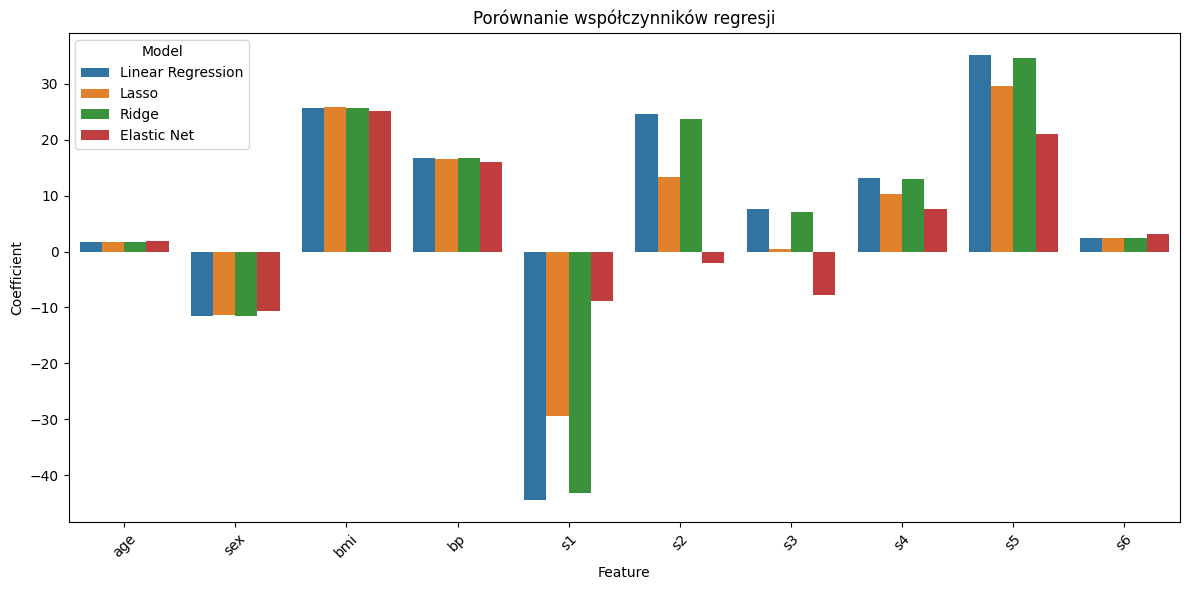

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', hue='Model', data=coefs)
plt.title('Porównanie współczynników regresji')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_l1),
        mean_squared_error(y_test, y_pred_l2),
        mean_squared_error(y_test, y_pred_en)
    ],
    'R^2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_l1),
        r2_score(y_test, y_pred_l2),
        r2_score(y_test, y_pred_en)
    ]
})
results.set_index('Model', inplace=True)
results

,MSE,R^2
Model,,
Linear Regression,2900.193628,0.452603
Lasso,3403.575722,0.357592
Ridge,3077.415939,0.419153
Elastic Net,5311.212822,-0.002465


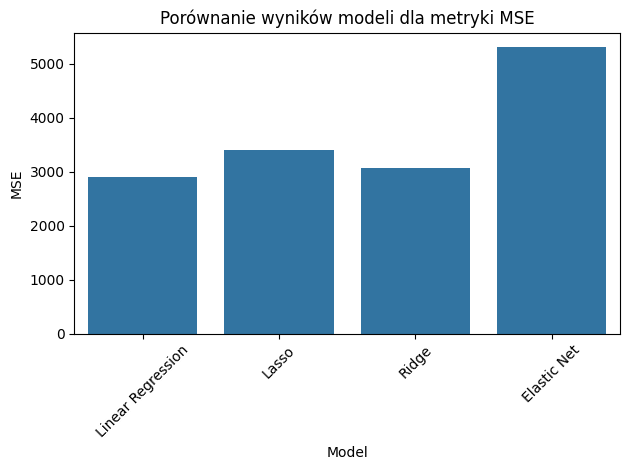

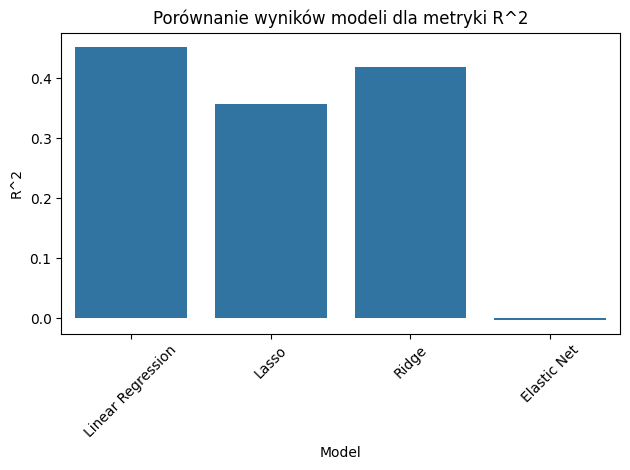

In [68]:
# Porównanie wyników
sns.barplot(results['MSE'])
plt.title('Porównanie wyników modeli dla metryki MSE')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.barplot(results['R^2'])
plt.title('Porównanie wyników modeli dla metryki R^2')
plt.ylabel('R^2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
# porównanie wyrazów wolnych
intercept = pd.DataFrame({
    'Linear Regression': lin_reg.intercept_,
    'Lasso': lasso.intercept_,
    'Ridge': ridge.intercept_,
    'Elastic Net': elastic_net.intercept_
}, index=['Intercept'])
intercept

,Linear Regression,Lasso,Ridge,Elastic Net
Intercept,151.345605,152.66396,152.241675,153.717751


In [69]:
## po dodaniu standaryzacji
# Regresja liniowa
lin_reg_std = LinearRegression()
lin_reg_std.fit(scaler.fit_transform(X_train), y_train)
y_pred_lr_scaled = lin_reg_std.predict(scaler.transform(X_test))


# Dodawanie regularizacji L1
lasso_std = Lasso()
lasso_std.fit(scaler.fit_transform(X_train), y_train)
y_pred_l1_scaled = lasso_std.predict(scaler.transform(X_test))


# Dodawanie regularizacji L2
ridge_std = Ridge()
ridge_std.fit(scaler.fit_transform(X_train), y_train)
y_pred_l2_scaled = ridge_std.predict(scaler.transform(X_test))


# Dodawanie regularyzaji ElasticNet
elastic_net_std = ElasticNet()
elastic_net_std.fit(scaler.fit_transform(X_train), y_train)
y_pred_en_scaled = elastic_net_std.predict(scaler.transform(X_test))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [70]:
# Porównanie współczynników regresji
coefs = pd.DataFrame({
    'Linear Regression': lin_reg_std.coef_,
    'Lasso': lasso_std.coef_,
    'Ridge': ridge_std.coef_,
    'Elastic Net': elastic_net_std.coef_
}, index=feature_names)
coefs

,Linear Regression,Lasso,Ridge,Elastic Net
age,1.753758,0.687032,1.807342,1.823916
sex,-11.511809,-9.297519,-11.448190,-6.042196
bmi,25.607121,26.219225,25.732699,18.961788
bp,16.828872,15.657314,16.734300,12.265206
s1,-44.448856,-8.228172,-34.671954,-1.179869
s2,24.640954,-0.000000,17.053075,-2.880352
s3,7.676978,-9.024087,3.369914,-8.437919
s4,13.138784,3.420861,11.764260,5.846287
s5,35.161195,22.636465,31.378384,14.419951
s6,2.351364,2.098647,2.458139,5.012798


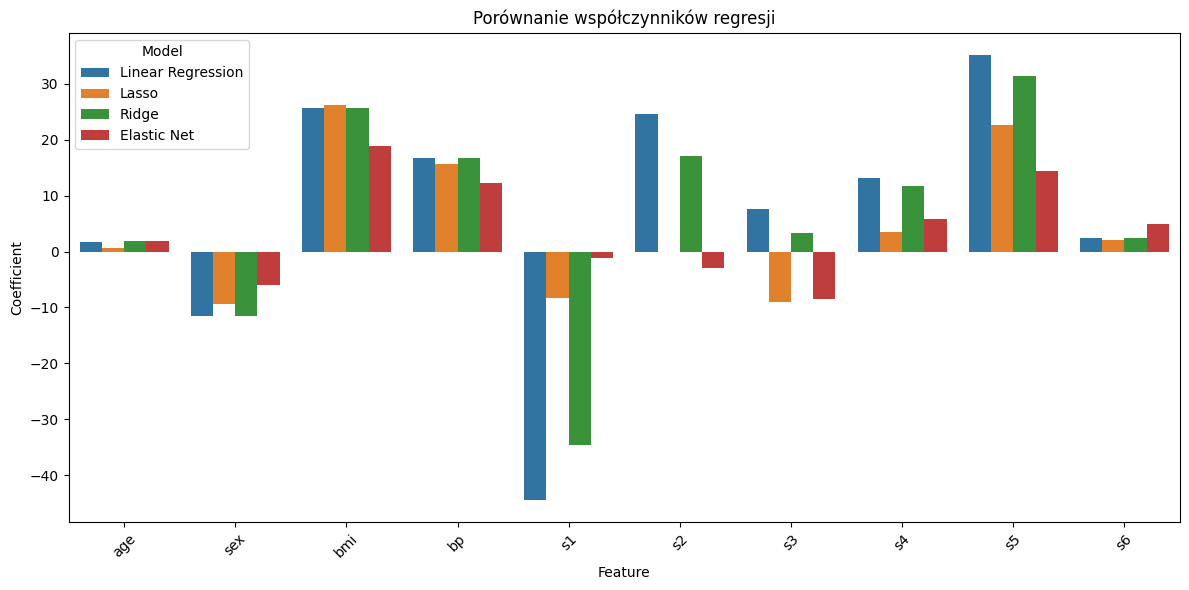

In [71]:
coefs = coefs.T
coefs = coefs.rename_axis('Model').reset_index()
coefs = coefs.melt(id_vars='Model', var_name='Feature', value_name='Coefficient')
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', hue='Model', data=coefs)
plt.title('Porównanie współczynników regresji')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [74]:
# porównanie wyrazów wolnych
intercept = pd.DataFrame({
    'Linear Regression': lin_reg.intercept_,
    'Lasso': lasso.intercept_,
    'Ridge': ridge.intercept_,
    'Elastic Net': elastic_net.intercept_
}, index=['Intercept'])
intercept

,Linear Regression,Lasso,Ridge,Elastic Net
Intercept,151.345605,152.66396,152.241675,153.717751


In [ ]:
#Wybór optymalnego parametru alpha dla Lasso
alphas = np.logspace(-6, 2, num=9) 
alphas

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02])

In [87]:
models_lasso = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    models_lasso.append(lasso)
    y_pred_l1 = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_l1)
    print(f'Alpha: {alpha}, MSE: {mse}')

Alpha: 1e-06, MSE: 2900.189712526324
Alpha: 1e-05, MSE: 2900.1544806065212
Alpha: 0.0001, MSE: 2899.8033560853273
Alpha: 0.001, MSE: 2896.4097872031953
Alpha: 0.01, MSE: 2878.559386186606
Alpha: 0.1, MSE: 2798.1934851697188
Alpha: 1.0, MSE: 3403.575721607074
Alpha: 10.0, MSE: 5361.533457238513
Alpha: 100.0, MSE: 5361.533457238513


In [88]:
# Wybór optymalnego parametru alpha dla Ridge
models_ridge = []
alphas = np.logspace(-6, 2, num=9)
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    models_ridge.append(ridge)
    y_pred_l2 = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_l2)
    print(f'Alpha: {alpha}, MSE: {mse}')

Alpha: 1e-06, MSE: 2900.1883858501265
Alpha: 1e-05, MSE: 2900.1412951027955
Alpha: 0.0001, MSE: 2899.679429885337
Alpha: 0.001, MSE: 2895.821238005613
Alpha: 0.01, MSE: 2882.290180406012
Alpha: 0.1, MSE: 2856.4868876706546
Alpha: 1.0, MSE: 3077.41593882723
Alpha: 10.0, MSE: 4443.95263666302
Alpha: 100.0, MSE: 5233.663686578425


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

In [89]:
# dodanie szumu do danych
X_train_noisy = X_train.copy()
X_test_noisy = X_test.copy()
X_train_noisy['age'] += np.random.normal(0, 0.1, size=X_train_noisy.shape[0])
X_test_noisy['age'] += np.random.normal(0, 0.1, size=X_test_noisy.shape[0])
X_train_noisy['bmi'] += np.random.normal(0, 0.1, size=X_train_noisy.shape[0])
X_test_noisy['bmi'] += np.random.normal(0, 0.1, size=X_test_noisy.shape[0])
X_train_noisy.head()
X_train_noisy.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,0.005025,0.000184,-0.007788,0.001179,-0.000556,-0.000806,-0.000989,0.000377,0.001216,0.001891
std,0.112924,0.047644,0.107375,0.048469,0.047786,0.047631,0.047044,0.047790,0.047828,0.048380
min,-0.313730,-0.044642,-0.303042,-0.112399,-0.108893,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.077997,-0.044642,-0.078254,-0.036656,-0.035968,-0.032629,-0.032356,-0.039493,-0.033246,-0.030072
50%,0.008527,-0.044642,-0.009745,-0.005670,-0.004321,-0.004132,-0.006584,-0.002592,-0.000612,0.003064
75%,0.090346,0.050680,0.070126,0.035644,0.025950,0.027183,0.026550,0.034309,0.033654,0.032059
max,0.282092,0.050680,0.308080,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612


In [90]:
# Trening modeli na danych z szumem
lin_reg_noisy = LinearRegression()
lin_reg_noisy.fit(X_train_noisy, y_train)
y_pred_lr_noisy = lin_reg_noisy.predict(X_test_noisy)

lasso_noisy = Lasso()
lasso_noisy.fit(X_train_noisy, y_train)
y_pred_l1_noisy = lasso_noisy.predict(X_test_noisy)

ridge_noisy = Ridge()
ridge_noisy.fit(X_train_noisy, y_train)
y_pred_l2_noisy = ridge_noisy.predict(X_test_noisy)

elastic_net_noisy = ElasticNet()
elastic_net_noisy.fit(X_train_noisy, y_train)
y_pred_en_noisy = elastic_net_noisy.predict(X_test_noisy)

# Porównanie wyników modeli na danych z szumem
results_noisy = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr_noisy),
        mean_squared_error(y_test, y_pred_l1_noisy),
        mean_squared_error(y_test, y_pred_l2_noisy),
        mean_squared_error(y_test, y_pred_en_noisy)
    ],
    'R^2': [
        r2_score(y_test, y_pred_lr_noisy),
        r2_score(y_test, y_pred_l1_noisy),
        r2_score(y_test, y_pred_l2_noisy),
        r2_score(y_test, y_pred_en_noisy)
    ]
})

results_noisy.set_index('Model', inplace=True)
results_noisy

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,MSE,R^2
Model,,
Linear Regression,3113.731115,0.412299
Lasso,3619.548205,0.316828
Ridge,3259.893527,0.384711
Elastic Net,5309.348058,-0.002113


In [91]:
results

,MSE,R^2
Model,,
Linear Regression,2900.193628,0.452603
Lasso,3403.575722,0.357592
Ridge,3077.415939,0.419153
Elastic Net,5311.212822,-0.002465
